<a href="https://colab.research.google.com/github/M4teoSandoval/Clase-Inteligencia-Artificiall/blob/main/Cuaderno_5_Creaci%C3%B3n_de_Nuevas_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 5: Creación de Nuevas Características
La creación de nuevas características (feature engineering) es un paso crucial en el preprocesamiento de datos, ya que puede mejorar la capacidad predictiva de los modelos al transformar y combinar los datos originales. En este Sesion, exploraremos estrategias para crear características basadas en datos existentes y ejemplos prácticos para cada caso.


---

## <font color="red">5.1 Combinación y Transformación de Características Existentes
La combinación de características implica usar variables existentes para generar nuevas que reflejen relaciones entre ellas.
### Ejemplo: Crear una relación entre dos columnas


In [ ]:
import pandas as pd

# Dataset de ejemplo
data = pd.DataFrame({
    "Precio": [100, 200, 150, 300],
    "Cantidad": [2, 5, 3, 8]
})

# Crear una nueva característica: Total
data["Total"] = data["Precio"] * data["Cantidad"]
print("Datos con nueva característica:\n", data)


Datos con nueva característica:
    Precio  Cantidad  Total
0     100         2    200
1     200         5   1000
2     150         3    450
3     300         8   2400


## <font color="red">5.2 Generación de Características Temporales
Los datos con marcas de tiempo pueden enriquecerse extrayendo información útil como año, mes, día, hora o día de la semana.
### Ejemplo: Procesamiento de características temporales


In [ ]:
# Agregar fechas al dataset
data["Fecha"] = pd.to_datetime(["2023-01-01", "2023-01-15", "2023-02-10", "2023-03-01"])

# Extraer características temporales
data["Año"] = data["Fecha"].dt.year
data["Mes"] = data["Fecha"].dt.month
data["Día"] = data["Fecha"].dt.day
data["Día_Semana"] = data["Fecha"].dt.day_name()
print("Datos con características temporales:\n", data)


Datos con características temporales:
    Precio  Cantidad  Total      Fecha   Año  Mes  Día Día_Semana
0     100         2    200 2023-01-01  2023    1    1     Sunday
1     200         5   1000 2023-01-15  2023    1   15     Sunday
2     150         3    450 2023-02-10  2023    2   10     Friday
3     300         8   2400 2023-03-01  2023    3    1  Wednesday


## <font color="red">5.3 Extracción de Características a partir de Texto
El procesamiento de texto permite transformar datos no estructurados en representaciones numéricas útiles.
### <font color="blue">5.3.1 Tokenización y Conteo de Palabras
La tokenización divide el texto en palabras o frases, y el conteo de palabras mide la frecuencia de términos en un texto.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Datos de texto
data_texto = pd.DataFrame({
    "Texto": ["Hola mundo", "Machine learning es increíble", "Python es popular"]
})

# Vectorizador de palabras
vectorizer = CountVectorizer()
matriz_frecuencia = vectorizer.fit_transform(data_texto["Texto"])

# Mostrar el vocabulario y la matriz
print("\nVocabulario:", vectorizer.get_feature_names_out())
print("Matriz de frecuencia:\n", matriz_frecuencia.toarray())



Vocabulario: ['es' 'hola' 'increíble' 'learning' 'machine' 'mundo' 'popular' 'python']
Matriz de frecuencia:
 [[0 1 0 0 0 1 0 0]
 [1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 1]]


## <font color="red">5.4 Extracción de Características Geoespaciales
Los datos geoespaciales pueden enriquecerse mediante cálculos como distancias, regiones o agrupaciones espaciales.
### Ejemplo: Distancia entre coordenadas
Utilizamos la fórmula de Haversine para calcular la distancia entre dos puntos geográficos.


In [ ]:
from geopy.distance import geodesic


# Coordenadas de dos ubicaciones
data_geo = pd.DataFrame({
    "Latitud": [19.4326, 40.7128],  # Ciudad de México, Nueva York
    "Longitud": [-99.1332, -74.0060]
})


# Calcular distancias desde un punto de referencia
referencia = (19.4326, -99.1332)  # Ciudad de México
data_geo["Distancia_km"] = data_geo.apply(
    lambda row: geodesic(referencia, (row["Latitud"], row["Longitud"])).kilometers, axis=1
)
print("\nDatos con distancia geoespacial:\n", data_geo)


Datos con distancia geoespacial:
    Latitud  Longitud  Distancia_km
0  19.4326  -99.1332        0.0000
1  40.7128  -74.0060     3357.6952


In [6]:
# prompt: crear un dataframe con datos sinteticos que tenga la edad que va de 17 a22 años, la ubicacion (latitud y longitud) en la  periferia de bucarammanga, el nombre de el estudiante, la nota de inteligencia artificial de 1 a 5, por favor dame 100 datos de estudiantes

import pandas as pd
import numpy as np

# Número de estudiantes
num_estudiantes = 100

# Crear datos sintéticos
edades = np.random.randint(17, 23, num_estudiantes)
latitudes = np.random.uniform(7.10, 7.15, num_estudiantes)  # Periferia de Bucaramanga (aproximado)
longitudes = np.random.uniform(-73.15, -73.10, num_estudiantes) # Periferia de Bucaramanga (aproximado)
nombres = [f"Estudiante_{i}" for i in range(1, num_estudiantes + 1)]
notas_ia = np.random.randint(1, 6, num_estudiantes)

# Crear DataFrame
data = {
    'edad': edades,
    'latitud': latitudes,
    'longitud': longitudes,
    'nombre': nombres,
    'nota_ia': notas_ia
}
df = pd.DataFrame(data)

print(df.head())


   edad   latitud   longitud        nombre  nota_ia
0    18  7.103359 -73.123080  Estudiante_1        3
1    19  7.120262 -73.116917  Estudiante_2        2
2    22  7.124873 -73.113107  Estudiante_3        3
3    18  7.136010 -73.123992  Estudiante_4        5
4    20  7.105329 -73.128659  Estudiante_5        5


In [7]:
# prompt: necesito que se muestre la distancia en km desde la UNAB bucaramanga a cada una de esas casas

# Coordenadas de la UNAB Bucaramanga (aproximadas, debes reemplazarlas con las coordenadas exactas)
unab_bucaramanga = (7.1234, -73.1234)

# Calcular distancias
df['distancia_unab_km'] = df.apply(
    lambda row: geodesic(unab_bucaramanga, (row['latitud'], row['longitud'])).kilometers, axis=1
)

print(df[['nombre', 'latitud', 'longitud', 'distancia_unab_km']])


            nombre   latitud   longitud  distancia_unab_km
0     Estudiante_1  7.103359 -73.123080           2.216668
1     Estudiante_2  7.120262 -73.116917           0.795764
2     Estudiante_3  7.124873 -73.113107           1.148615
3     Estudiante_4  7.136010 -73.123992           1.396102
4     Estudiante_5  7.105329 -73.128659           2.081234
..             ...       ...        ...                ...
95   Estudiante_96  7.126513 -73.100426           2.561059
96   Estudiante_97  7.122052 -73.146924           2.602896
97   Estudiante_98  7.120224 -73.105855           1.969730
98   Estudiante_99  7.128621 -73.124196           0.584098
99  Estudiante_100  7.140199 -73.104674           2.780323

[100 rows x 4 columns]


In [8]:
# prompt: haz el mapa con mapbox

import pandas as pd
from geopy.distance import geodesic
import plotly.express as px

# ... (Your existing code) ...

# Assuming 'df' is your DataFrame with 'latitud', 'longitud', and 'distancia_unab_km'

# Create the map
fig = px.scatter_mapbox(df,
                        lat="latitud",
                        lon="longitud",
                        hover_name="nombre",
                        hover_data=["distancia_unab_km", "edad", "nota_ia"],
                        color="nota_ia",
                        zoom=12,
                        height=600,
                        width=800,
                        mapbox_style="open-street-map")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


## <font color="red">5.5 Visualización de Nuevas Características
### <font color="blue">5.5.1 Gráfico de características temporales y relaciones


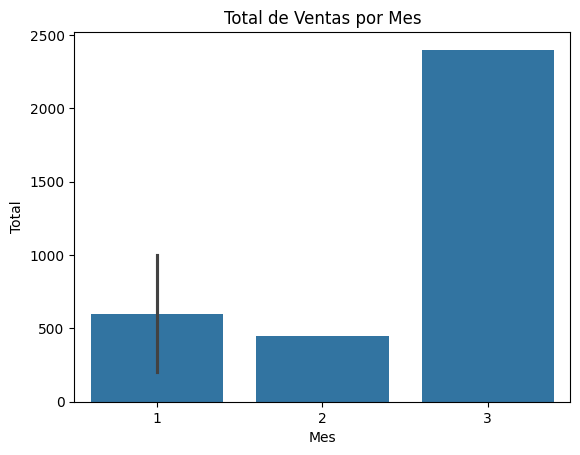

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Total por Mes
sns.barplot(x="Mes", y="Total", data=data)
plt.title("Total de Ventas por Mes")
plt.show()


### <font color="blue">5.5.2 Gráfico de distribución geoespacial


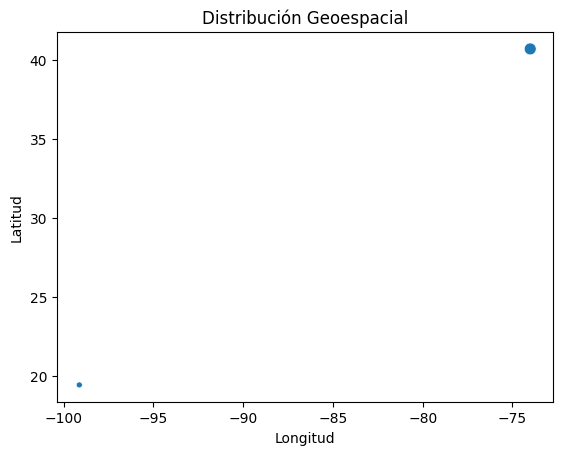

In [ ]:
# Gráfico de puntos geográficos
sns.scatterplot(x="Longitud", y="Latitud", size="Distancia_km", data=data_geo, legend=False)
plt.title("Distribución Geoespacial")
plt.show()


In [5]:
# prompt: Necesito un programa que me calcule la distancia desde la UNAB bucaramanga hasta la carrera 39 n32-64 bucaramanga

from geopy.geocoders import Nominatim
from geopy.distance import geodesic

def calcular_distancia(origen, destino):
  geolocator = Nominatim(user_agent="my_geocoder")

  try:
    location_origen = geolocator.geocode(origen)
    location_destino = geolocator.geocode(destino)

    if location_origen and location_destino:
      coord_origen = (location_origen.latitude, location_origen.longitude)
      coord_destino = (location_destino.latitude, location_destino.longitude)
      distancia = geodesic(coord_origen, coord_destino).kilometers
      return distancia
    else:
      return "No se pudo encontrar la ubicación."
  except Exception as e:
    return f"Error: {e}"

origen = "Universidad Autónoma de Bucaramanga, Bucaramanga"
destino = "Carrera 39 # 32-64, Bucaramanga"

distancia = calcular_distancia(origen, destino)
print(f"La distancia entre {origen} y {destino} es de {distancia} kilómetros.")


La distancia entre Universidad Autónoma de Bucaramanga, Bucaramanga y Carrera 39 # 32-64, Bucaramanga es de 0.20716327178873115 kilómetros.
